Enunciado del problema:
Implementa en Python una función con la siguiente cabecera
def integra_mc(fun, a, b, num_puntos=10000)
que calcule la integral de fun entre a y b por el método de Monte Carlo antes descrito, generando
para ello num_puntos aleatoriamente. Puedes comprobar la corrección del resultado obtenido,
comparándolo con el de aplicar la función scipy.integrate.quad de Python.
Debes implementar dos versiones del algoritmo, una iterativa que realice num_puntos iteraciones para calcular el resultado, y otra que utilice operaciones entre vectores en lugar de bucles,
comparando los tiempos de ejecución obtenidos con ambas versiones

In [1]:
import time
import numpy as np
import scipy
import matplotlib.pyplot as plt

Código de ejemplo dado por la profesora.

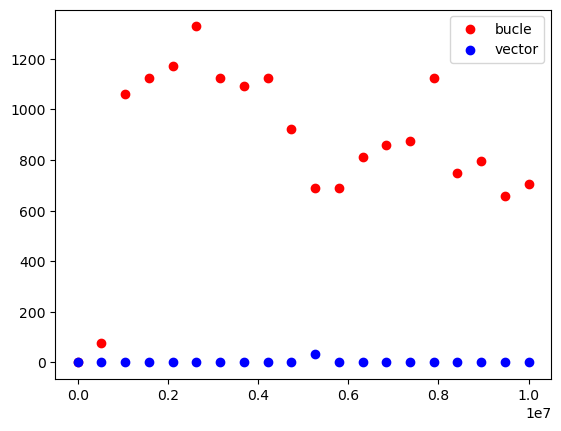

In [240]:


def dot_product(x1, x2):
    """Calcula el producto escalar con un bucle"""
    dot = 0
    for i in range(len(x1)):
        dot += x1[i] * x2[i]
    return dot

def fast_dot_product(x1, x2):
    """Calcula el producto escalar vectorizado"""
    dot = np.dot(x1, x2)
    return dot

def compara_tiempos_dot():
    sizes = np.linspace(100, 10000000, 20)
    times_dot = []
    times_fast_dot = []
    for size in sizes:
        x1 = np.random.uniform(1, 100, int(size))
        x2 = np.random.uniform(1, 100, int(size))
        tic = time.process_time()
        dot = dot_product(x1, x2)
        toc = time.process_time()
        times_dot += [1000 * (toc - tic)]
        tic = time.process_time()
        fast_dot = fast_dot_product(x1, x2)
        toc = time.process_time()
        times_fast_dot += [1000 * (toc - tic)]
    plt.figure()
    plt.scatter(sizes, times_dot, c='red', label='bucle')
    plt.scatter(sizes, times_fast_dot, c='blue', label='vector')
    plt.legend()
    plt.savefig('compara tiempos dot.png')
    
compara_tiempos_dot()

Definimos una función cualquiera.

In [237]:
def integra_mc_loop(fun =  lambda x: x**2, a = 0, b = 2, num_puntos = 10000):    
    random_points = []
    fun_points = []
    num = 0
    points = np.linspace(a, b, num_puntos)
    fun_points = fun(points)
    M = max(fun_points)
    
    while num < num_puntos:
        random_points.append([np.random.uniform(a, b), np.random.uniform(0, M)])
        num+=1
    debajo = 0
    for punto in random_points:
        if (fun(punto[0]) >= punto[1]):
            debajo += 1
    
    
    int = (debajo/num_puntos)*(b-a)*M
    
    return int 

def integra_mc(fun =  lambda x: x**2, a = 0, b = 2, num_puntos = 10000): 
    points = np.linspace(a,b,num_puntos)
    fun_points = fun(points)
    M = max(fun_points)
    x = np.random.uniform(a, b, num_puntos)
    y = np.random.uniform(0, M, num_puntos)
    
    debajo = np.count_nonzero(y <= fun(x))
            
    int = (debajo/num_puntos)*(b-a)*M
    
    return int

fun = lambda x: x**2


print(integra_mc(fun))
print(integra_mc_loop(fun))
print(scipy.integrate.quad(fun, 0, 2))


    
    
    
    
    

2.6704
2.6576
(2.666666666666667, 2.960594732333751e-14)


(2.666666666666667, 2.960594732333751e-14)
2.6336
2.6704


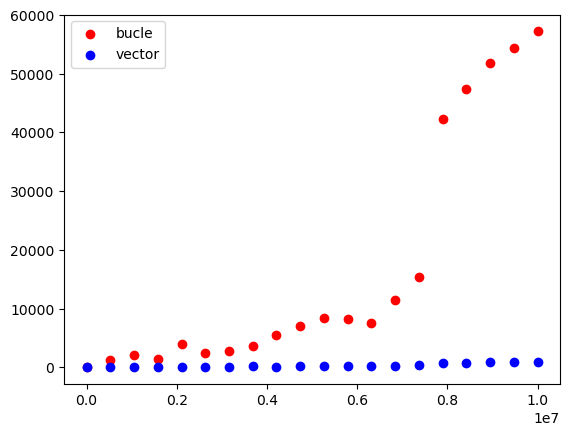

In [247]:
def compara_tiempos(fun1 , fun2):
    sizes = np.linspace(100, 10000000, 20)
    times_dot = []
    times_fast_dot = []
    fun = lambda x: x**2
    for size in sizes:
        tic = time.process_time()
        fun1(num_puntos = int(size))
        toc = time.process_time()
        times_dot += [1000 * (toc - tic)]
        tic = time.process_time()
        fun2(num_puntos = int(size))
        toc = time.process_time()
        times_fast_dot += [1000 * (toc - tic)]
    plt.figure()
    plt.scatter(sizes, times_dot, c='red', label='bucle')
    plt.scatter(sizes, times_fast_dot, c='blue', label='vector')
    plt.legend()
    plt.savefig('compara tiempos dot.png')

print(scipy.integrate.quad(fun, 0, 2))
print(integra_mc_loop())
print(integra_mc())
compara_tiempos(integra_mc_loop,integra_mc)
